In [1]:
#first setting the gpu preallocation to 50% instead of the default 75%
%env XLA_PYTHON_CLIENT_MEM_FRACTION=.50
#importing the necessary libraries
import jax
import jax.numpy as jnp
import numpy as np
from jax import grad, jit, vmap
from jax import random
import matplotlib.pyplot as plt

env: XLA_PYTHON_CLIENT_MEM_FRACTION=.50


In [2]:
%%timeit -o
#code running on the gpu
#generating random numbers
key = random.PRNGKey(0)
x = random.normal(key, (10,))
#multiplying 2 very big matrices
size = 4000
x = random.normal(key, (size, size), dtype=jnp.float32)
jnp.dot(x, x.T).block_until_ready()

49 ms ± 639 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 49 ms ± 639 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [3]:
result_jax_gpu = _

In [4]:
%%timeit -o
#code running on the cpu
with jax.default_device(jax.devices('cpu')[0]):
    key = random.PRNGKey(0)
    x = random.normal(key, (10,))
    size = 4000
    x = random.normal(key, (size, size), dtype=jnp.float32)
    jnp.dot(x, x.T).block_until_ready()

1.33 s ± 3.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 1.33 s ± 3.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [5]:
result_jax_cpu = _

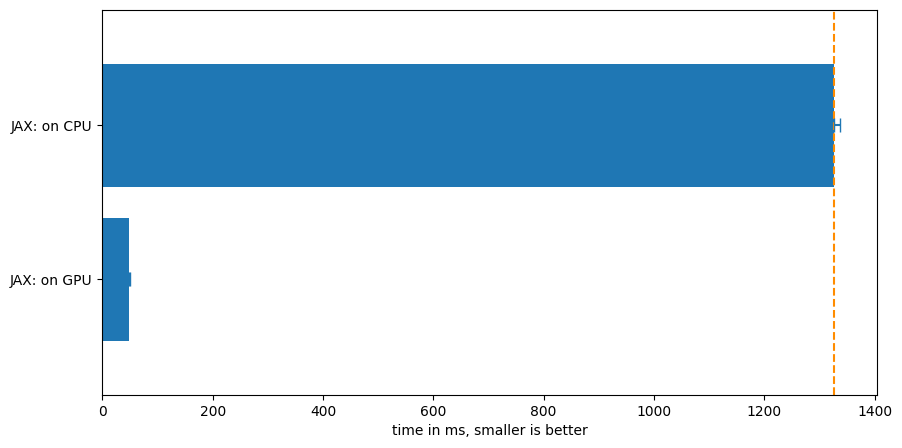

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
test_names = [
    "JAX: on CPU",
    "JAX: on GPU"
][::-1]
test_results = np.array([
    1e3 * np.min(result_jax_cpu.all_runs) / result_jax_cpu.loops,
    1e3 * np.min(result_jax_gpu.all_runs) / result_jax_gpu.loops,
][::-1])
test_variations = np.array([
    1e3 * np.ptp(result_jax_cpu.all_runs) / result_jax_cpu.loops,
    1e3 * np.ptp(result_jax_gpu.all_runs) / result_jax_gpu.loops,
][::-1])
ax.axvline(test_results[-1], c="darkorange", ls="--");
ax.barh(range(len(test_names)), test_results);
ax.errorbar(test_results + test_variations/2, range(len(test_names)), xerr=test_variations/2, capsize=5, fmt="none", c="#1f77b4");
ax.set_yticks(range(len(test_names)));
ax.set_yticklabels(test_names);
ax.set_xlabel("time in ms, smaller is better");
ax.set_ylim(-0.75, len(test_results) - 0.25);